In [42]:
%matplotlib inline


In [97]:
# Imports
import torch
from torch.autograd import Variable # Variable can then be used for backpropagation
from torch.nn import functional as F
import torch.nn as nn
import matplotlib.pyplot as plt


# Linear regression Data
# My line: y = 3x + 4
x_vector = torch.Tensor(100).uniform_(-20,20)[:,None] # data needs to be in vector form
noise = torch.randn_like(x_vector) * 7
y_vector = 3*x_vector + 4 + noise
x_data = Variable(x_vector) 
y_data = Variable(y_vector)

In [125]:
# Custom Linear Layer
class CustomLinearLayer(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(CustomLinearLayer, self).__init__()
        
        # Define parameters (weights and bias)
        self.weight = nn.Parameter(torch.randn(output_size, input_size))
        self.bias = nn.Parameter(torch.randn(output_size))
                
    def forward(self, x):
        # Implement the forward pass
        print(x.shape)
        x = x@self.weight + self.bias
        return x


In [126]:
# Linear Layer
class LinearRegression(torch.nn.Module): # Class needs to be from torch.nn.Module
    def __init__(self):
        super().__init__()
        #self.linear = torch.nn.Linear(1, 1,bias=True)
        self.linear = CustomLinearLayer(1,1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [127]:
model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


for epoch in range(100):
    print('\n\n Epoch:',epoch)
    for i in model.parameters():
        print('Parameters before',i)
    optimizer.zero_grad() # Reset the gradient
    
    # Forward pass
    y_pred = model.forward(x_data)
    #print('y_pred',y_pred)
    
    # Compute Loss
    loss = criterion(y_pred, y_data)
    print('\nloss',loss)

    
    # Backward pass
    loss.backward()
    for param in model.parameters():
        print('\nGradient',param.grad.data)
    
    optimizer.step()
    for i in model.parameters():
        print('Parameters after step',i)
print(loss)



 Epoch: 0
Parameters before Parameter containing:
tensor([[0.5848]], requires_grad=True)
Parameters before Parameter containing:
tensor([-0.2419], requires_grad=True)
torch.Size([100, 1])

loss tensor(948.5436, grad_fn=<MseLossBackward0>)

Gradient tensor([[-737.8060]])

Gradient tensor([-4.4739])
Parameters after step Parameter containing:
tensor([[1.3226]], requires_grad=True)
Parameters after step Parameter containing:
tensor([-0.2374], requires_grad=True)


 Epoch: 1
Parameters before Parameter containing:
tensor([[1.3226]], requires_grad=True)
Parameters before Parameter containing:
tensor([-0.2374], requires_grad=True)
torch.Size([100, 1])

loss tensor(487.0854, grad_fn=<MseLossBackward0>)

Gradient tensor([[-513.0272]])

Gradient tensor([-5.3162])
Parameters after step Parameter containing:
tensor([[1.8357]], requires_grad=True)
Parameters after step Parameter containing:
tensor([-0.2321], requires_grad=True)


 Epoch: 2
Parameters before Parameter containing:
tensor([[1.8357]

torch.Size([100, 1])


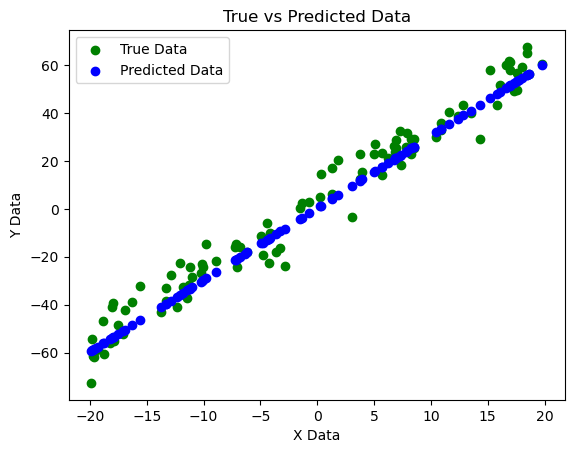

In [128]:
import matplotlib.pyplot as plt

# Assuming x_data and y_data are PyTorch tensors, and model.forward(x_data) gives predictions

# Create the scatter plot
plt.scatter(x_data.detach().numpy(), y_data.detach().numpy(), color='green', label='True Data')  
plt.scatter(x_data.detach().numpy(), model.forward(x_data).detach().numpy(), color='blue', label='Predicted Data')  

# Add labels and title
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('True vs Predicted Data')


# Show legend
plt.legend()

# Show the plot
plt.show()
